IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M3\NO_FAULT3


VARIABILE RCOU POTENZA MOTORI

In [3]:
pd.set_option('display.max_rows',700)

In [4]:
#andiamo a prendere una potenza media di 1400 per considerare il momento il cui inizia/finisce il volo
rcou_m3 = pd.read_csv("RCOU.csv")
rcou_m3 = rcou_m3.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m3 = rcou_m3[((rcou_m3['C9'] >= 1400) & (rcou_m3['C10'] >= 1400) & (rcou_m3['C11'] >= 1400) & (rcou_m3['C12'] >= 1400) & (rcou_m3['C13'] >= 1400) & (rcou_m3['C14']>= 1400))]

display(rcou_m3)

,TimeUS,C9,C10,C11,C12,C13,C14
1627,85367015,1409,1423,1421,1411,1412,1420
1634,85455328,1430,1503,1467,1469,1426,1506
1635,85466083,1535,1405,1425,1519,1488,1459
1636,85476353,1535,1419,1435,1522,1491,1468
1637,85486221,1508,1464,1476,1496,1495,1477
...,...,...,...,...,...,...,...
8627,162716617,1549,1520,1566,1502,1456,1605
8628,162729348,1551,1519,1559,1510,1447,1613
8629,162740384,1598,1461,1520,1545,1460,1599
8630,162751646,1620,1423,1544,1513,1512,1545


In [5]:
#xkf utilizzato per fare poi il confronto con i valori di roll, pitch e yaw in att
xkf1_m3 = pd.read_csv("XKF1_0.csv")
xkf1_m3 = xkf1_m3.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m3 = xkf1_m3[((xkf1_m3['TimeUS'] >= 85367015) & (xkf1_m3['TimeUS'] <= 162761906))]
print(xkf1_m3)

         TimeUS  Roll  Pitch     Yaw
1630   85375369  2.02  -0.82    3.32
1631   85386208  2.12  -0.83    3.31
1632   85397274  2.12  -0.83    3.30
1633   85411016  2.12  -0.83    3.31
1634   85421240  2.08  -0.82    3.32
...         ...   ...    ...     ...
8630  162714243 -1.24   1.36  358.15
8631  162727101 -1.18   1.24  358.17
8632  162738085 -1.06   1.13  358.20
8633  162749622 -0.97   1.00  358.25
8634  162759649 -0.91   0.94  358.31

[7005 rows x 4 columns]


In [6]:
att_m3 = pd.read_csv("ATT.csv")
att_m3 = att_m3.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m3 = att_m3[((att_m3['TimeUS'] >= 85367015) & (att_m3['TimeUS'] <= 162761906))]
print(att_m3)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw     Yaw
1630   85377132     0.12  2.02      0.25  -0.82    3.31    3.32
1631   85387977     0.12  2.12      0.25  -0.83    3.31    3.31
1632   85399231     0.12  2.12      0.25  -0.83    3.31    3.30
1633   85412090     0.12  2.12      0.25  -0.83    3.31    3.31
1634   85422886     0.12  2.08      0.25  -0.82    3.31    3.32
...         ...      ...   ...       ...    ...     ...     ...
8632  162715997     0.96 -1.24     -0.34   1.36  359.91  358.16
8633  162728615     0.96 -1.18     -0.36   1.24  359.91  358.18
8634  162739678     0.95 -1.06     -0.37   1.13  359.91  358.21
8635  162751006     0.93 -0.97     -0.38   1.00  359.91  358.26
8636  162761104     0.89 -0.91     -0.36   0.94  359.91  358.32

[7007 rows x 7 columns]


In [7]:
#controllo corrispondenza valori roll, pitch, yaw
att_m3 = pd.merge_asof(att_m3, xkf1_m3, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m3)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw     Yaw
0      85377132     0.12  2.02      0.25  -0.82    3.31    3.32
1      85387977     0.12  2.12      0.25  -0.83    3.31    3.31
2      85399231     0.12  2.12      0.25  -0.83    3.31    3.30
3      85412090     0.12  2.12      0.25  -0.83    3.31    3.31
4      85422886     0.12  2.08      0.25  -0.82    3.31    3.32
...         ...      ...   ...       ...    ...     ...     ...
7002  162715997     0.96 -1.24     -0.34   1.36  359.91  358.16
7003  162728615     0.96 -1.18     -0.36   1.24  359.91  358.18
7004  162739678     0.95 -1.06     -0.37   1.13  359.91  358.21
7005  162751006     0.93 -0.97     -0.38   1.00  359.91  358.26
7006  162761104     0.89 -0.91     -0.36   0.94  359.91  358.32

[7007 rows x 7 columns]


In [8]:
#elettricita' che scorre nel motore considerato, al momento ne consideriamo solo 1
esc_2_m3 = pd.read_csv("ESC_2.csv")
esc_2_m3 = esc_2_m3.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_2_m3 = esc_2_m3[((esc_2_m3['TimeUS'] >= 85367015) & (esc_2_m3['TimeUS'] <= 162761906))]
print(esc_2_m3)

        TimeUS   RPM  Curr
75    85391090  3616  1.88
76    85490957  4180  2.78
77    85599449  4737  3.27
78    85713158  5238  3.87
79    85823917  5589  3.71
80    85928548  5783  4.40
81    86044930  6075  4.17
82    86149477  6108  3.71
83    86254871  5975  3.90
84    86362885  6096  4.15
85    86481150  5948  4.05
86    86695313  6028  3.99
87    86808563  6057  3.73
88    86914892  6085  3.91
89    87023539  6127  4.01
90    87133956  6115  4.07
91    87241880  6139  4.00
92    87352119  6088  3.70
93    87457129  5974  3.84
94    87572142  6183  3.44
95    87677226  6024  3.86
96    87788428  5974  4.06
97    87892398  6016  3.94
98    88005073  6067  4.28
99    88120480  6001  4.16
100   88225624  6035  4.08
101   88333990  6212  4.08
102   88444049  6097  3.81
103   88559203  6035  3.33
104   88667906  5965  3.95
105   88776512  5916  3.67
106   88875215  5937  3.46
107   88989339  5735  3.87
108   89097967  5841  4.06
109   89209751  6101  4.11
110   89319318  6123  4.23
1

In [9]:
#valori di accelerazione e del giroscopio
imu_2_m3 = pd.read_csv("IMU_2.csv")
imu_2_m3 = imu_2_m3.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m3 = imu_2_m3[((imu_2_m3['TimeUS'] >= 85367015) & (imu_2_m3['TimeUS'] <= 162761906))]
print(imu_2_m3)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
6451    85368457 -0.181722  0.093754  0.024741 -0.866543 -0.116783 -10.142210
6452    85371388 -0.208164  0.103560  0.031193 -0.762052  0.111343  -9.938101
6453    85374861  0.138230  0.051932 -0.005966 -0.628603  0.135127  -9.959167
6454    85376986  0.254744 -0.017038 -0.027869 -0.471229 -0.414409 -10.125980
6455    85379998  0.010357  0.006515 -0.013460 -0.389499 -0.738853  -9.942119
...          ...       ...       ...       ...       ...       ...        ...
33075  162750903  0.042051 -0.073910  0.084327  0.546242  1.379015 -10.995900
33076  162753921  0.242567 -0.197909  0.080087  0.601652  1.148209 -11.456660
33077  162756071  0.232023 -0.195597  0.080861  0.327865  1.009666 -11.708270
33078  162758628  0.069632 -0.045681  0.102050  0.694734  1.295387 -11.944350
33079  162760938  0.060612 -0.024657  0.108850  1.207662  1.554294 -12.127130

[26629 rows x 7 columns]


In [10]:
#sincronizzazione dei tempi tra att e imu_2
m3_nofault = pd.merge_asof(att_m3, imu_2_m3, on="TimeUS",  tolerance= 100000)
print(m3_nofault)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw     Yaw      GyrX  \
0      85377132     0.12  2.02      0.25  -0.82    3.31    3.32  0.254744   
1      85387977     0.12  2.12      0.25  -0.83    3.31    3.31  0.165885   
2      85399231     0.12  2.12      0.25  -0.83    3.31    3.30 -0.092640   
3      85412090     0.12  2.12      0.25  -0.83    3.31    3.31  0.044760   
4      85422886     0.12  2.08      0.25  -0.82    3.31    3.32 -0.027738   
...         ...      ...   ...       ...    ...     ...     ...       ...   
7002  162715997     0.96 -1.24     -0.34   1.36  359.91  358.16 -0.036940   
7003  162728615     0.96 -1.18     -0.36   1.24  359.91  358.18 -0.123880   
7004  162739678     0.95 -1.06     -0.37   1.13  359.91  358.21  0.000310   
7005  162751006     0.93 -0.97     -0.38   1.00  359.91  358.26  0.042051   
7006  162761104     0.89 -0.91     -0.36   0.94  359.91  358.32  0.060612   

          GyrY      GyrZ      AccX      AccY       AccZ  
0    -0.017038 -0

In [11]:
#sincronizzazione dei tempi tra la tabella ottenuta precedentemente e esc_0 (corrente che passa nel motore)
m3_nofault = pd.merge_asof(esc_2_m3, m3_nofault, on="TimeUS",  tolerance= 100000)
print(m3_nofault)

        TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0     85391090  3616  1.88     0.12   2.12      0.25  -0.83    3.31    3.31   
1     85490957  4180  2.78     0.12   2.02      0.27  -0.77    3.31    3.33   
2     85599449  4737  3.27    -0.07   2.22      0.21  -0.63    3.31    3.37   
3     85713158  5238  3.87    -0.57   2.31     -0.03  -0.21    3.31    3.71   
4     85823917  5589  3.71    -1.27   1.66     -0.18   0.60    3.31    4.64   
5     85928548  5783  4.40    -1.92   0.35     -0.22   0.87    3.31    5.75   
6     86044930  6075  4.17    -2.55  -0.67     -0.34   0.83    3.32    6.79   
7     86149477  6108  3.71    -2.95  -0.83     -0.52   0.92    3.33    7.65   
8     86254871  5975  3.90    -3.17  -1.00     -0.88   0.83    3.35    8.56   
9     86362885  6096  4.15    -3.48  -1.45     -1.21   0.14    3.37    9.43   
10    86481150  5948  4.05    -3.93  -2.08     -1.44  -0.08    3.38    9.99   
11    86695313  6028  3.99    -4.71  -2.73     -1.65

In [12]:
#aggiornamento del tempo ponendo a 0 il momento in cui il volo inizia per noi e settaggio della variabile guasto
m3_nofault["TimeUS"] = m3_nofault["TimeUS"] - m3_nofault.iloc[0]["TimeUS"]
m3_nofault["TimeUS"] = m3_nofault["TimeUS"].astype(int)
m3_nofault["Guasto"] = 0
print(m3_nofault)

       TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0           0  3616  1.88     0.12   2.12      0.25  -0.83    3.31    3.31   
1       99867  4180  2.78     0.12   2.02      0.27  -0.77    3.31    3.33   
2      208359  4737  3.27    -0.07   2.22      0.21  -0.63    3.31    3.37   
3      322068  5238  3.87    -0.57   2.31     -0.03  -0.21    3.31    3.71   
4      432827  5589  3.71    -1.27   1.66     -0.18   0.60    3.31    4.64   
5      537458  5783  4.40    -1.92   0.35     -0.22   0.87    3.31    5.75   
6      653840  6075  4.17    -2.55  -0.67     -0.34   0.83    3.32    6.79   
7      758387  6108  3.71    -2.95  -0.83     -0.52   0.92    3.33    7.65   
8      863781  5975  3.90    -3.17  -1.00     -0.88   0.83    3.35    8.56   
9      971795  6096  4.15    -3.48  -1.45     -1.21   0.14    3.37    9.43   
10    1090060  5948  4.05    -3.93  -2.08     -1.44  -0.08    3.38    9.99   
11    1304223  6028  3.99    -4.71  -2.73     -1.65  -1.02    3.

In [13]:
path_file = path_file.replace(r"M3\NO_FAULT3", "")
os.chdir(path_file)
m3_nofault.to_csv('m3_nofault.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


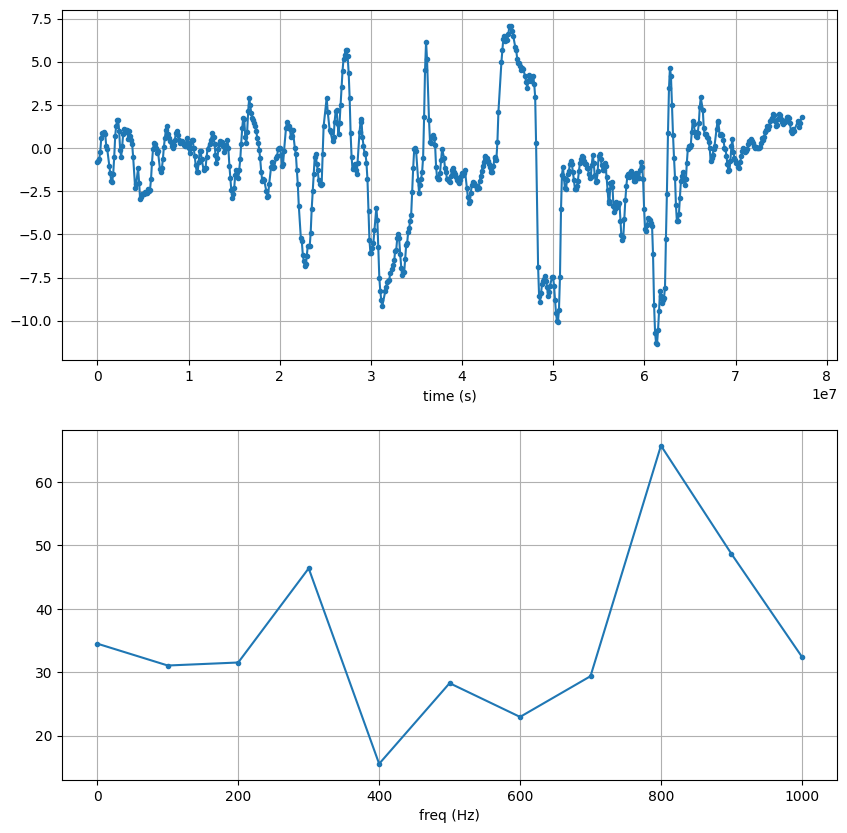

In [14]:
t = m3_nofault["TimeUS"]
y = m3_nofault["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

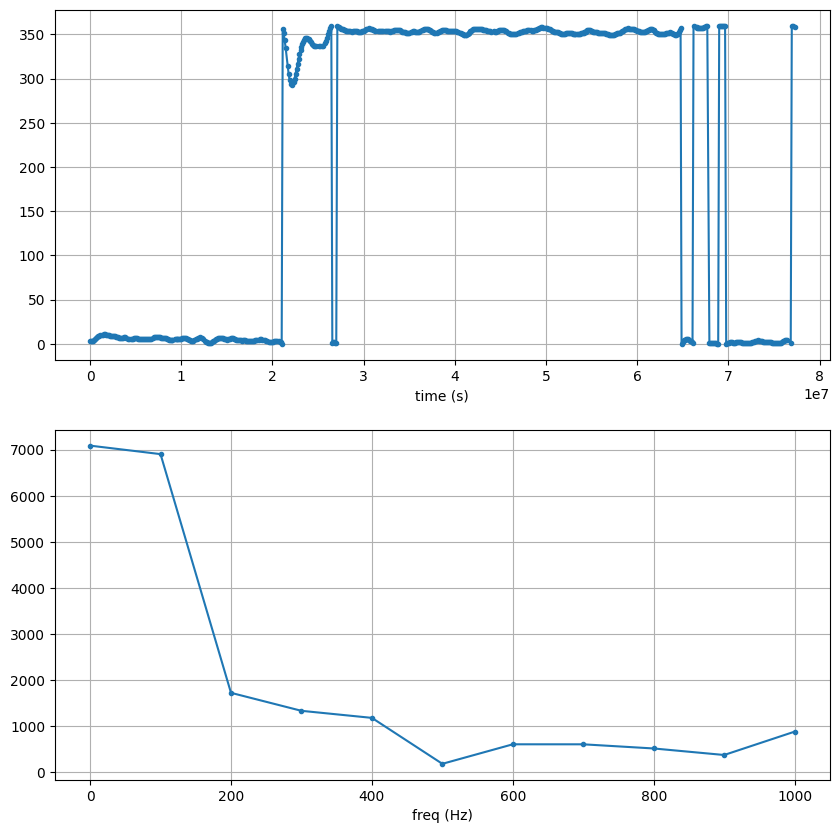

In [15]:
t = m3_nofault["TimeUS"]
y = m3_nofault["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

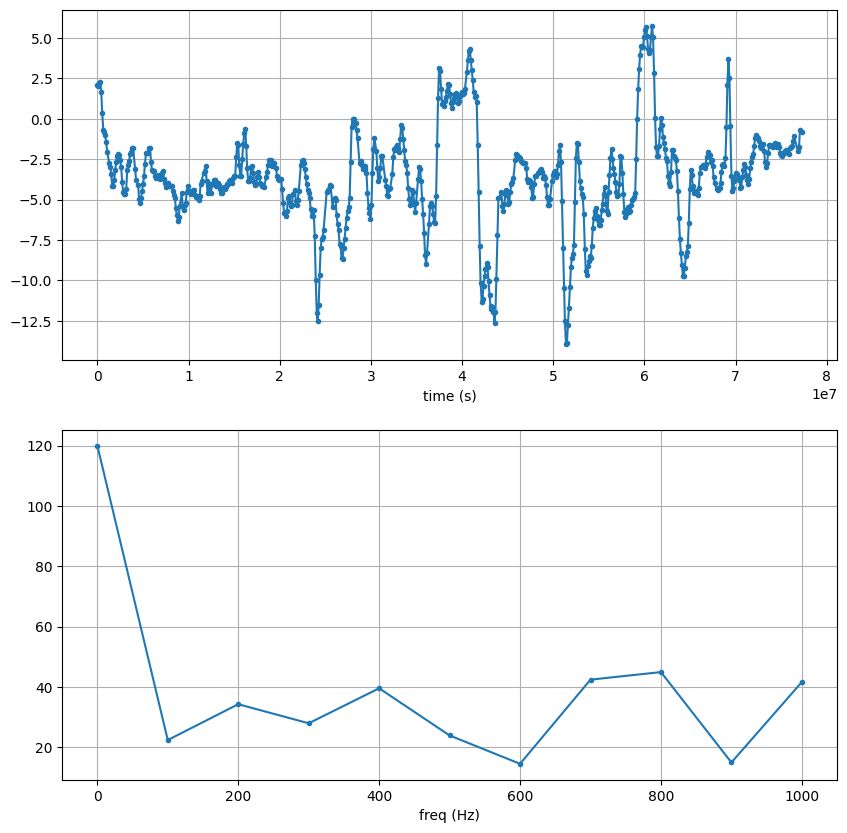

In [16]:
t = m3_nofault["TimeUS"]
y = m3_nofault["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

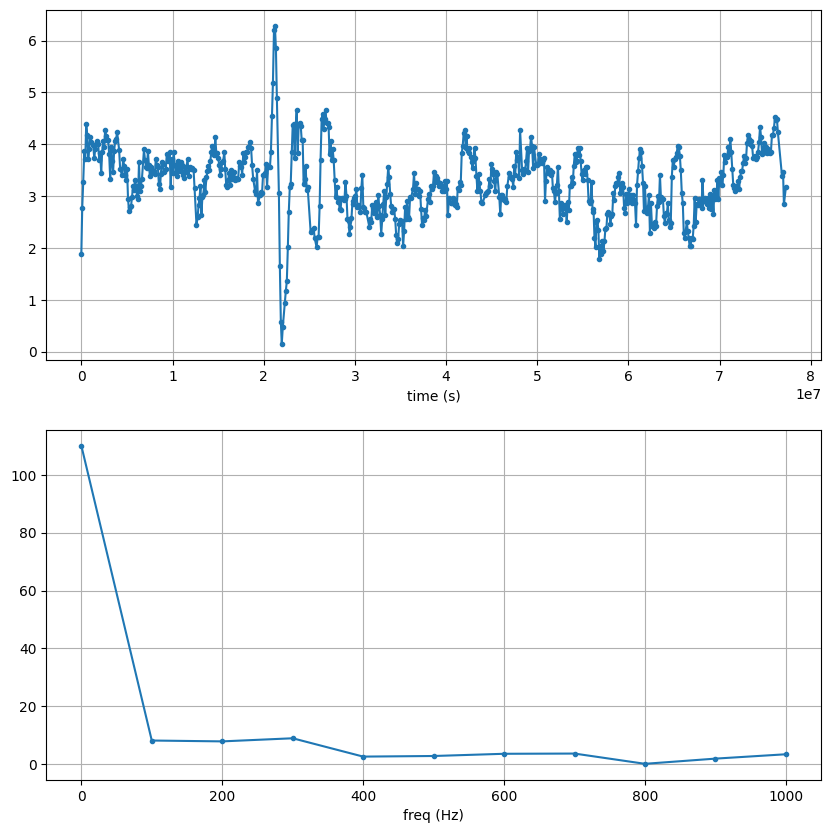

In [17]:
t = m3_nofault["TimeUS"]
y = m3_nofault["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

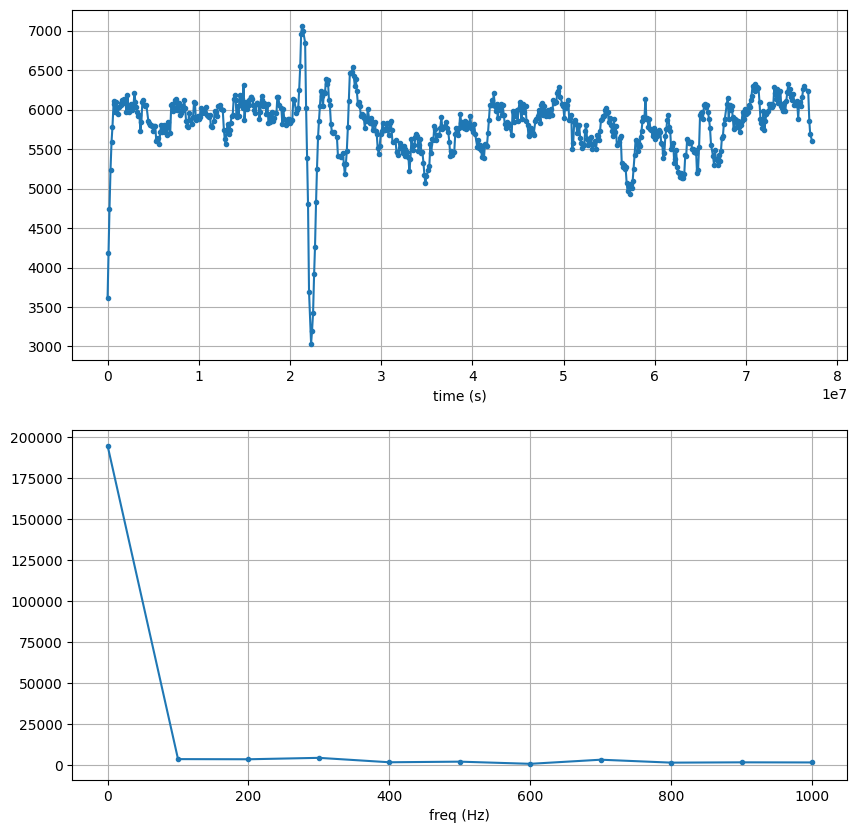

In [18]:
t = m3_nofault["TimeUS"]
y = m3_nofault["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

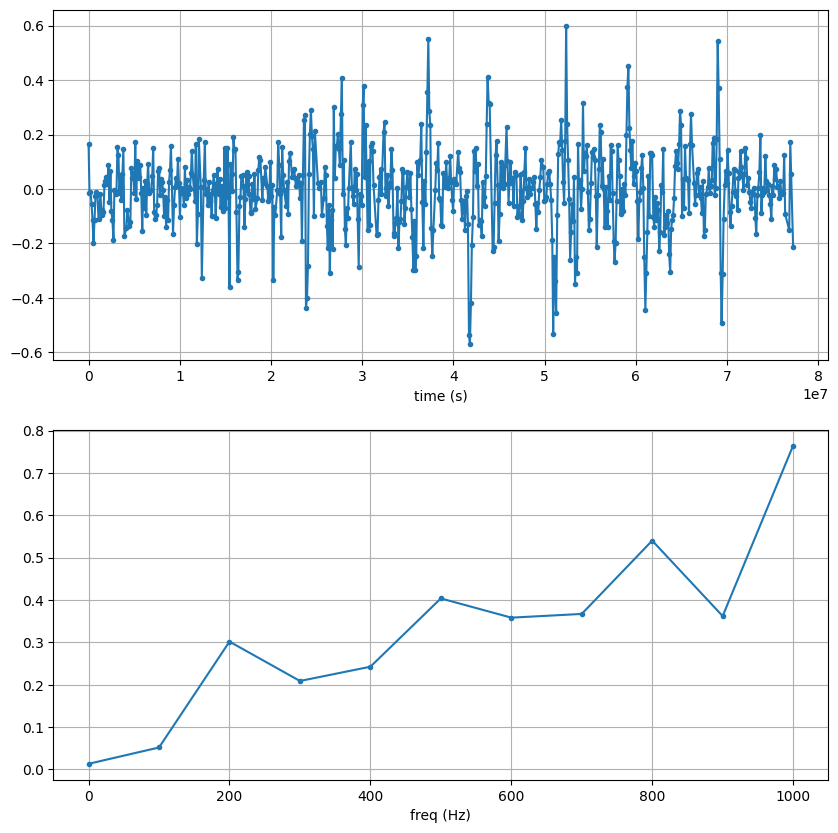

In [19]:
t = m3_nofault["TimeUS"]
y = m3_nofault["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

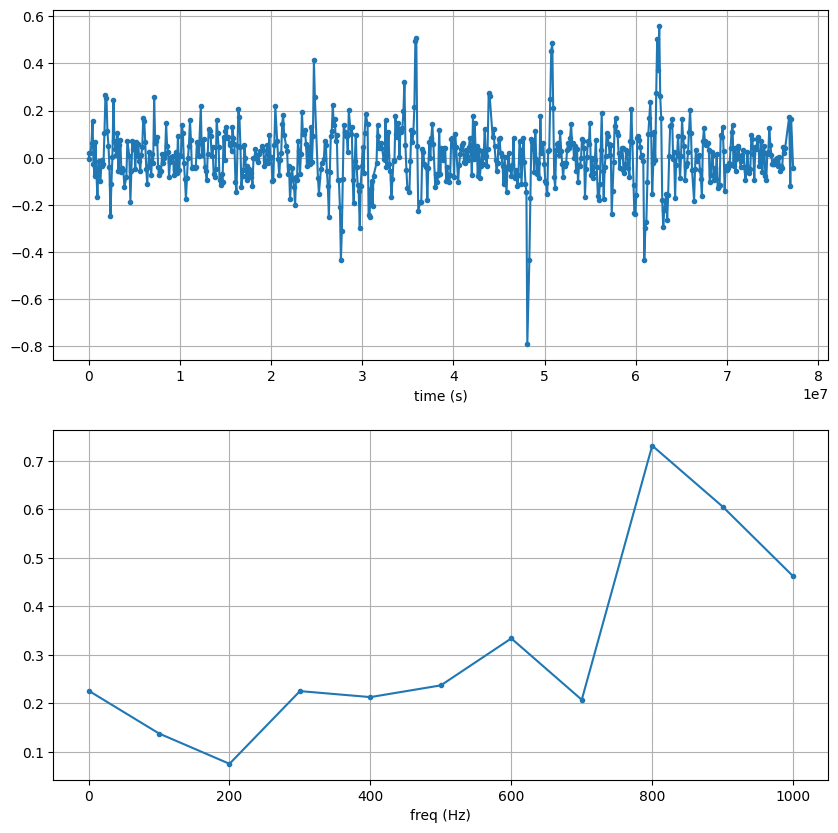

In [20]:
t = m3_nofault["TimeUS"]
y = m3_nofault["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

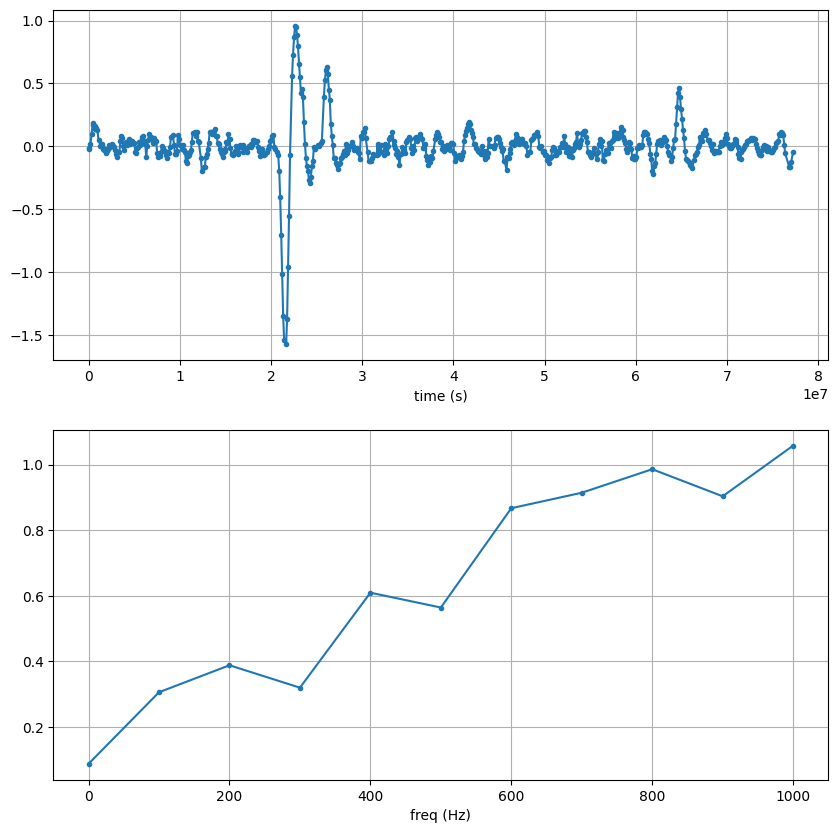

In [21]:
t = m3_nofault["TimeUS"]
y = m3_nofault["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

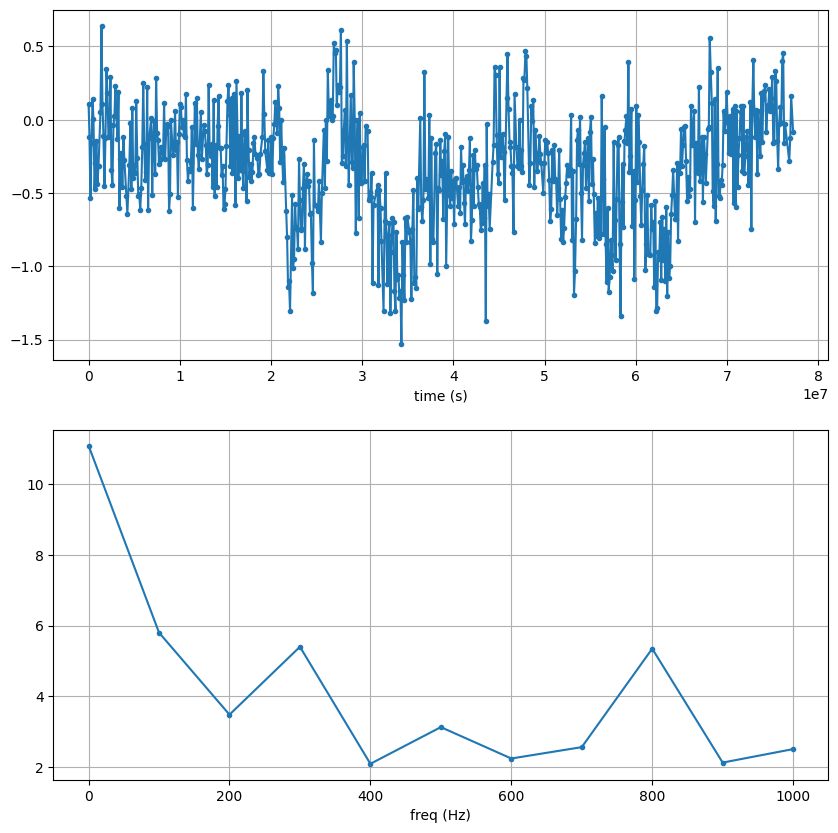

In [22]:
t = m3_nofault["TimeUS"]
y = m3_nofault["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

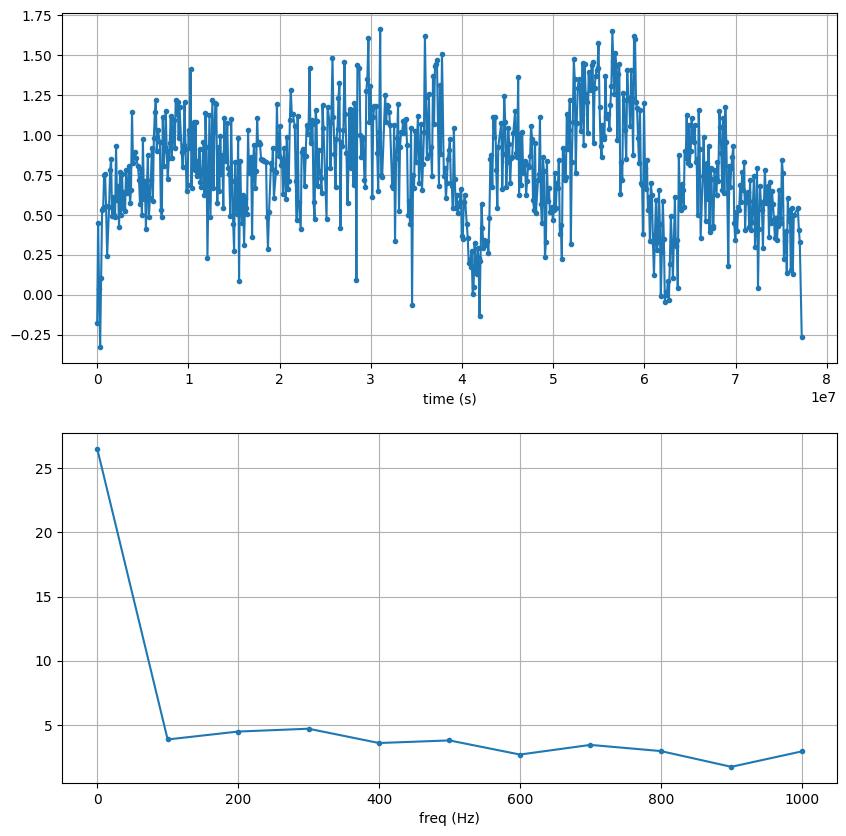

In [23]:
t = m3_nofault["TimeUS"]
y = m3_nofault["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

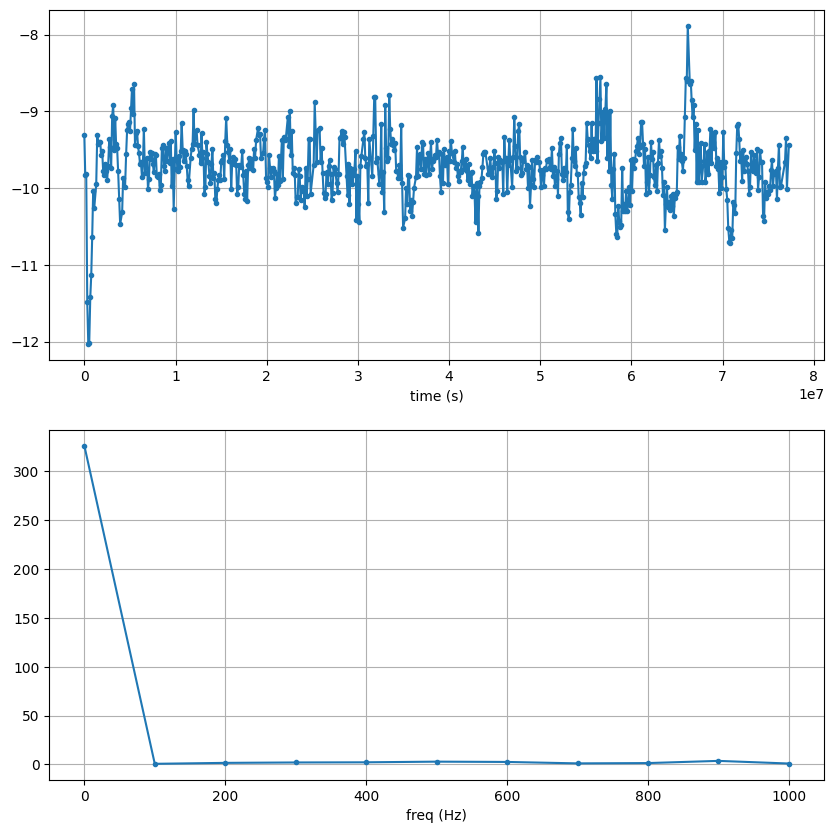

In [24]:
t = m3_nofault["TimeUS"]
y = m3_nofault["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()